In [1]:
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords

C:\Users\chanc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['target','sms'])

In [4]:
pd.set_option('future.no_silent_downcasting', True)

In [5]:
df['target'] = df['target'].replace('ham',0)
df['target'] = df['target'].replace('spam',1)

In [6]:
df['target'] 

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: object

In [7]:
Y = df.iloc[:,:-1] #Select all rows and all but the last column for Y
X = df.iloc[:,-1:] #Select all rows and all but the first column for X

In [8]:
Y['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: object

In [9]:
from nltk.stem import PorterStemmer
import re

In [10]:
ps = PorterStemmer()
messages = X['sms']
corpus = []
for data in range(0, len(messages)):
    msg = re.sub('[^a-zA-Z]', ' ', messages[data])
    #msg = msg.lower()
    msg = [ps.stem (word) for word in msg.split() if not word in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [12]:
corpus[:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate t c appli',
 'u dun say earli hor u c alreadi say',
 'nah i think goe usf live around though',
 'freemsg hey darl week word back i like fun still tb ok xxx std chg send rcv',
 'even brother like speak they treat like aid patent',
 'as per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner as valu network custom select receivea prize reward to claim call claim code kl valid hour',
 'had mobil month u r entitl updat latest colour mobil camera free call the mobil updat co free']

In [13]:
from tensorflow.keras.preprocessing.text import one_hot

In [14]:
vocab_size = 500
one_hot_rep = [one_hot(words,  vocab_size) for words in corpus]

In [ ]:
one_hot_rep

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
sentence_len = 200

embedded_data = pad_sequences(one_hot_rep, padding="pre", maxlen = sentence_len)

In [20]:
embedded_data

array([[  0,   0,   0, ..., 123, 204, 482],
       [  0,   0,   0, ..., 386, 160,   1],
       [  0,   0,   0, ..., 208, 499, 192],
       ...,
       [  0,   0,   0, ..., 496, 477, 224],
       [  0,   0,   0, ..., 143, 471,  84],
       [  0,   0,   0, ..., 120, 107,  37]])

In [21]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [22]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',metrics =['accuracy'] )
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 40)           20000     
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 76501 (298.83 KB)
Trainable params: 76501 (298.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
import numpy as np

In [25]:
X_data = np.array(embedded_data)
Y_data = np.array(Y['target']).astype(float)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, x_test, Y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [29]:
model.fit(X_train, Y_train, validation_data=(x_test,y_test), epochs=10, batch_size = 64)

Epoch 1/10


70/70 [==============================] - 28s 347ms/step - loss: 0.3195 - accuracy: 0.8943 - val_loss: 0.1357 - val_accuracy: 0.9605
Epoch 2/10
70/70 [==============================] - 25s 354ms/step - loss: 0.1000 - accuracy: 0.9693 - val_loss: 0.0673 - val_accuracy: 0.9794
Epoch 3/10
70/70 [==============================] - 24s 350ms/step - loss: 0.0635 - accuracy: 0.9791 - val_loss: 0.0570 - val_accuracy: 0.9839
Epoch 4/10
70/70 [==============================] - 24s 346ms/step - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0573 - val_accuracy: 0.9830
Epoch 5/10
70/70 [==============================] - 23s 330ms/step - loss: 0.0435 - accuracy: 0.9879 - val_loss: 0.0545 - val_accuracy: 0.9821
Epoch 6/10
70/70 [==============================] - 25s 354ms/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0567 - val_accuracy: 0.9803
Epoch 7/10
70/70 [==============================] - 24s 339ms/step - loss: 0.0254 - accuracy: 0.9946 - val_loss: 0.0670 - val_accuracy: 0.97

In [30]:
y_pred = model.predict(x_test)

35/35 [==============================] - 2s 42ms/step


In [31]:
y_pred

array([[0.00164097],
       [0.01461411],
       [0.00148637],
       ...,
       [0.00030163],
       [0.00030242],
       [0.06482828]], dtype=float32)

In [32]:
y_pred=np.where(y_pred > 0.5, 1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       966
         1.0       0.89      0.92      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [34]:
accuracy_score(y_test, y_pred)

0.9739910313901345

In [35]:
confusion_matrix(y_test, y_pred)

array([[949,  17],
       [ 12, 137]], dtype=int64)

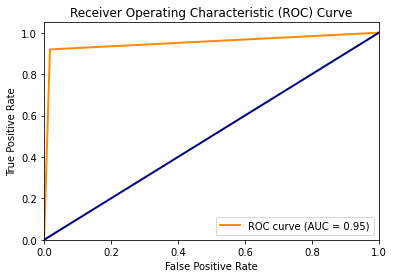

In [36]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
new_data = "Our regular day took a scary turn when our daughter woke up with severe fever and her face started swelling. Fearing for our daughter health, we rushed to the hospital. Now, we're here, seeing her struggle for each breath on the ventilator. The doctors say her treatment will cost ₹10 lakhs!  How will a poor family like ours manage such a HUGE amount? With nothing left to sell and no savings, our time is running out to save our dying daughter. Our Aastha deserves a long, happy, and healthy life. Only your support can make this happen."
msg = re.sub('[^a-zA-Z]', ' ', new_data)
msg = [ps.stem (word) for word in msg.split() if not word in stopwords.words('english')]
print(len(msg))
new_data = ' '.join(msg)


57


C:\Users\chanc\anaconda3\lib\site-packages\IPython\core\inputtransformer2.py:603: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [52]:
one_hot_rep_new_data = one_hot(new_data, vocab_size)

In [53]:
def find_duplicates(arr):
    unique_elements = set()
    duplicates = set()
    for num in arr:
        if num in unique_elements:
            duplicates.add(num)
        else:
            unique_elements.add(num)
    return list(duplicates)

duplicates = find_duplicates(one_hot_rep_new_data)
print("Duplicate numbers:", duplicates)

Duplicate numbers: [71, 463, 303, 316, 473, 412]


In [54]:
embedded_new_data = pad_sequences([one_hot_rep_new_data], padding = "pre" ,maxlen= sentence_len)
embedded_new_data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        316,  42, 282, 415, 401,  71,  71, 195, 451,  14, 308, 463, 111,
        479,  71,  26, 158,  29, 465, 466, 114, 473, 159,  91,  41, 486,
        463, 116, 359, 373,  53, 200, 141, 383, 414

In [55]:
result = model.predict(embedded_new_data)

1/1 [==============================] - 0s 72ms/step


In [56]:
np.where(result[0]>0.5, 'Spam','ham')[0]

'ham'